In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [164]:
import warnings
warnings.filterwarnings("ignore")

In [165]:
data=pd.read_csv(r"C:\Users\Micro\Downloads\AQI(1)\karimnagar.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    84 non-null     object
 1   AQI     84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [166]:
data["Date"]=pd.to_datetime(data["Date"])
data.set_index(data["Date"],inplace=True)
data.drop(["Date"],axis=1,inplace=True)

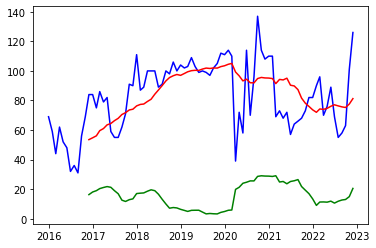

In [167]:
roll_mean = data.rolling(window=12).mean()
roll_std = data.rolling(window=12).std()
plt.plot(data,c='blue')
plt.plot(roll_mean,c='red')
plt.plot(roll_std,c='green')

In [168]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data["AQI"])
print(dftest)

(-3.493932283410786, 0.008144300169179806, 0, 83, {'1%': -3.5117123057187376, '5%': -2.8970475206326833, '10%': -2.5857126912469153}, 601.6312139303308)


In [169]:
shift2=data.AQI-data.AQI.shift(2)
print(adfuller(shift2.dropna()))
shift2=pd.DataFrame(shift2)

(-5.294633519206636, 5.6175616539343815e-06, 7, 74, {'1%': -3.5219803175527606, '5%': -2.9014701097664504, '10%': -2.58807215485756}, 599.8239540828346)


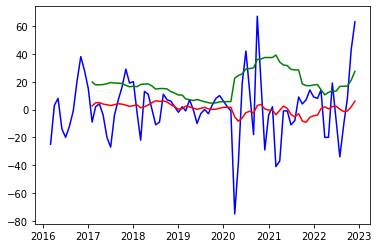

In [170]:
roll_mean = shift2.rolling(window=12).mean()
roll_std = shift2.rolling(window=12).std()
plt.plot(shift2,c='blue')
plt.plot(roll_mean,c='red')
plt.plot(roll_std,c='green')

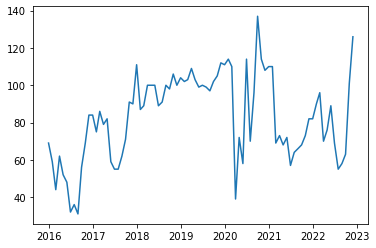

In [171]:
plt.plot(original)

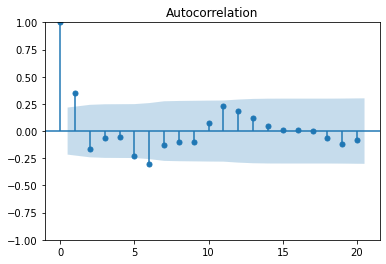

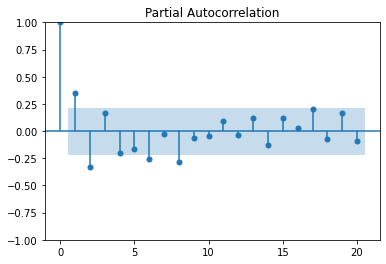

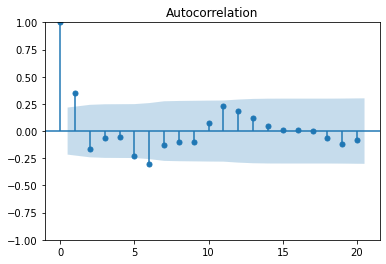

In [172]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_pacf(shift2.AQI.dropna())
plot_acf(shift2.AQI.dropna())

In [187]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data,seasonal_order=(1,2,2,3)) 
model_fit = model.fit()

In [188]:
res=model_fit.forecast(12)
res

2023-01-01     62.726775
2023-02-01    102.622844
2023-03-01    129.172724
2023-04-01     62.548962
2023-05-01    104.130054
2023-06-01    132.105384
2023-07-01     62.291351
2023-08-01    105.733974
2023-09-01    135.238820
2023-10-01     62.100479
2023-11-01    107.257011
2023-12-01    138.204339
Freq: MS, Name: predicted_mean, dtype: float64

In [189]:
# plt.plot(original[60:],label="Actual AQI")
# plt.plot(res,label="Predicted AQI")
# plt.legend()
# plt.title("TESTING AQI-KARIMNAGAR")

In [191]:
res=pd.DataFrame(res)

In [192]:
res.to_csv(r"C:\Users\Micro\Downloads\AQI\airpred_karimnagar.csv")